In [330]:
import schemdraw
from schemdraw.flow import *

lgreen, blue, orng, blk, yel, grn, gry = '#C5E0B5', '#8FABDD', '#ED7D31', 'black', '#FDD865', '#91D04E', '#ECECEC'
width, node_wdth, char_ht, lw, bw, arr_l = 8.5, 3.5, .5, 1, 0.5, 0.5
arr_kwargs = {
    'lw': lw, 'headlength': .15
}
y_labs = [r'$\hat y_\text{1H}$', r'$\hat y_\text{24H}$']


In [336]:
%%html
<style>
    .jp-WindowedPanel-outer {
        padding: 2% !important;
    }
    .jp-RenderedImage img {
        width: 50%;
        transform: translateX(-75%);
        margin-left: 50%;
    }
</style>


In [332]:
def CNN1D(d, output=r'$\hat y$'):
    d += (L := Circle(char_ht, color='white').label(r'$L$', color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(L.S)

    d += (conv42 := RoundProcess(node_wdth, 1, fill=lgreen, color=lgreen).label('Conv1D (k=4, d=2)', fontsize=12, color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(conv42.S)

    d += (conv34 := RoundProcess(node_wdth, 1, fill=blue, color=blue).label('Conv1D (k=3, d=4)', fontsize=12, color=blk))
    d += Line(lw=lw).down(2).at(conv34.S)
    d += Arrow(**arr_kwargs).right(3)

    d.move_from(L.E, width, 0)

    d += (TH := Circle(char_ht, color='white').label(r'$\left[T,H\right]$', color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(TH.S)

    d += (conv42 := RoundProcess(node_wdth, 1, fill=lgreen, color=lgreen).label('Conv1D (k=4, d=2)', fontsize=12, color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(conv42.S)

    d += (conv34 := RoundProcess(node_wdth, 1, fill=blue, color=blue).label('Conv1D (k=3, d=4)', fontsize=12, color=blk))
    d += Line(lw=lw).down(2).at(conv34.S)
    d += Arrow(**arr_kwargs).left(3)
    
    d += (conc := Process(node_wdth, 1, fill=orng, lw=bw).label('Concatenation', fontsize=12, color=blk))

    d.move_from(conc.N, .5, char_ht*3)
    d += (D := Circle(char_ht, color='white').label(r'$D$', color=blk))
    d += Arrow(**arr_kwargs).down(char_ht*2).at(D.S)
    
    d += Arrow(**arr_kwargs).down(arr_l).at(conc.S)

    d += (RMB1 := RoundProcess(node_wdth, 1.5, fill=yel, lw=bw).label(r'$\mathbf{RMB}$', fontsize=12, color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(RMB1.S)

    d += (RMB2 := RoundProcess(node_wdth, 1.5, fill=yel, lw=bw).label(r'$\mathbf{RMB}$', fontsize=12, color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(RMB2.S)

    d += (MU := Process(node_wdth, 1.5, fill=grn, lw=bw).label(r'$\mathbf{MU}$', fontsize=12, color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(MU.S)

    d += (MaxP := Process(node_wdth, 1, fill=gry, lw=bw).label(r'$\mathbf{MaxPool\;1D}$', fontsize=12, color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(MaxP.S)

    d += (Flat := Process(node_wdth, 1, fill=gry, lw=bw).label(r'$\mathbf{Flatten}$', fontsize=12, color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(Flat.S)

    d += (Drop := Process(node_wdth, 1, fill=gry, lw=bw).label(r'$\mathbf{Dropout}$', fontsize=12, color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(Drop.S)

    d += (FC1 := Process(node_wdth, 1, fill=gry, lw=bw).label(r'$\mathbf{FC\;Layer}$', fontsize=12, color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(FC1.S)

    d += (FC2 := Process(node_wdth, 1, fill=gry, lw=bw).label(r'$\mathbf{FC\;Layer}$', fontsize=12, color=blk))

    if type(output) == str:
        d += Arrow(**arr_kwargs).down(arr_l).at(FC2.S)
        d += (y_hat := Circle(char_ht, color='white').label(output, color=blk))
    else:
        d += Line(lw=lw).down(arr_l).at(FC2.S)
        n_spaces, space_w = len(output) - 1, 1.5
        
        d.move(n_spaces * space_w / 2, 0)
        d += Line(lw=lw).left(n_spaces * space_w)
        for out in output:
            d += Arrow(**arr_kwargs).down(arr_l)
            d += (y_hat := Circle(char_ht, color='white').label(out, color=blk))
            d.move_from(y_hat.N, space_w, arr_l)
            
    d.move_from(TH.E, node_wdth, char_ht)


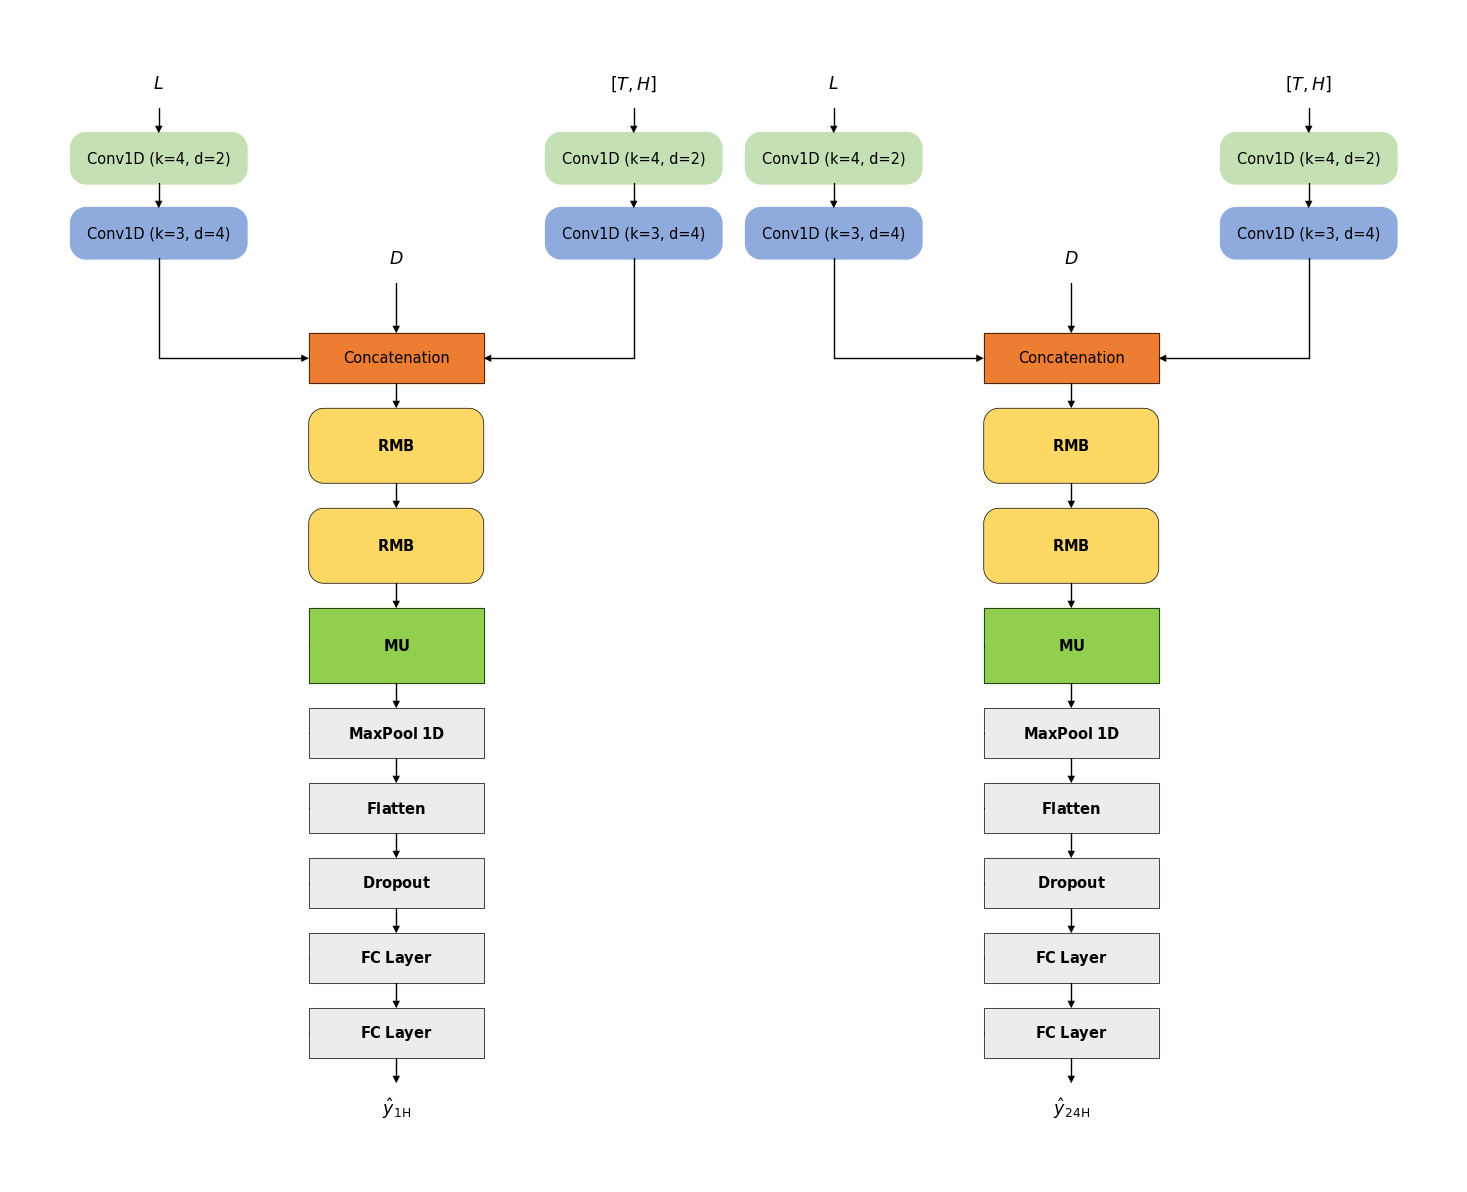

In [335]:
with schemdraw.Drawing() as d:

    for lab in y_labs:
        CNN1D(d, lab)


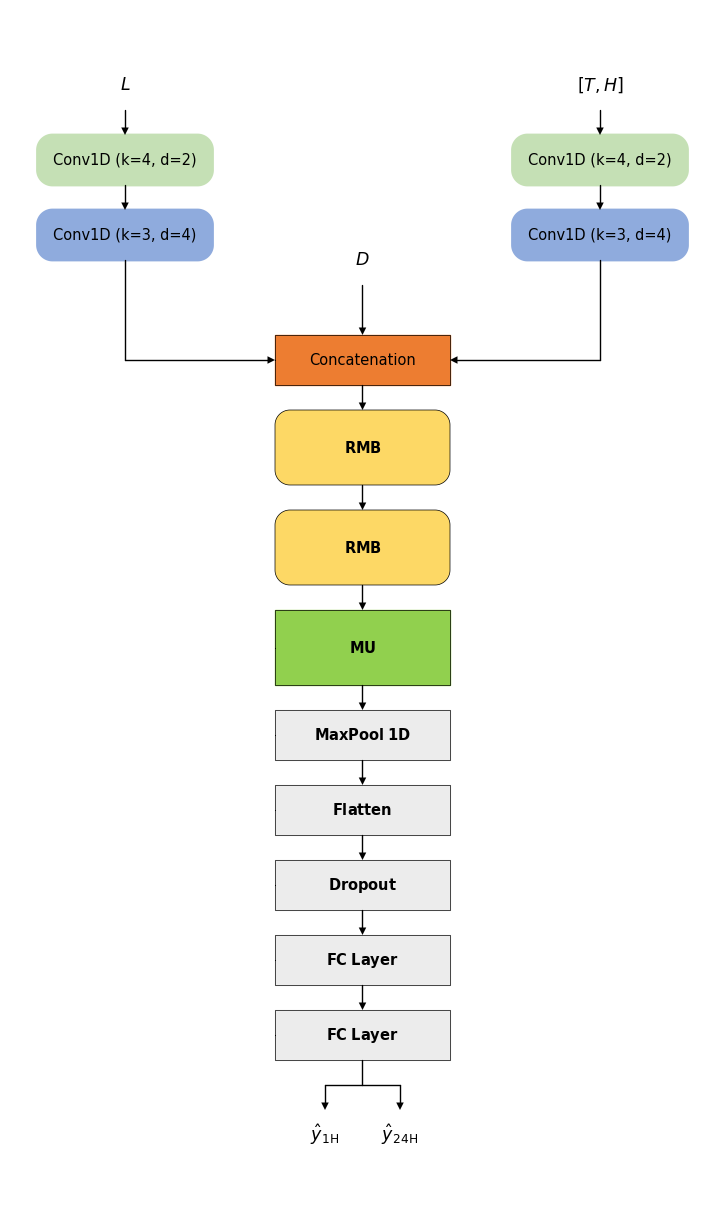

In [334]:
with schemdraw.Drawing() as d:

    CNN1D(d, y_labs)


In [412]:
def BDLSTM(d, output=r'$\hat y$'):

    d += (Inp := Circle(char_ht, color='white').label(r'$[L,T,H,D]$', color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(Inp.S)
    
    d += (For := Process(node_wdth, 1, fill=gry, lw=bw).label(r'$\mathbf{Forward}$', fontsize=12, color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(For.S)

    d += (Back := Process(node_wdth, 1, fill=gry, lw=bw).label(r'$\mathbf{Backward}$', fontsize=12, color=blk))
    
    d += Arc2(k=3, arrow='>', **arr_kwargs).to(Back.N).at(Inp.S)
    d += Arrow(**arr_kwargs).down(arr_l).at(Back.S)

    d += (Drop := Process(node_wdth, 1, fill=gry, lw=bw).label(r'$\mathbf{Dropout?}$', fontsize=12, color=blk))
    
    if type(output) == str:
        d += Arrow(**arr_kwargs).down(arr_l).at(Drop.S)
        d += (y_hat := Circle(char_ht, color='white').label(output, color=blk))
    else:
        d += Line(lw=lw).down(arr_l).at(Drop.S)
        n_spaces, space_w = len(output) - 1, 1.5
        
        d.move(n_spaces * space_w / 2, 0)
        d += Line(lw=lw).left(n_spaces * space_w)
        for out in output:
            d += Arrow(**arr_kwargs).down(arr_l)
            d += (y_hat := Circle(char_ht, color='white').label(out, color=blk))
            d.move_from(y_hat.N, space_w, arr_l)
            
    d.move_from(Inp.E, node_wdth*1.5, char_ht)


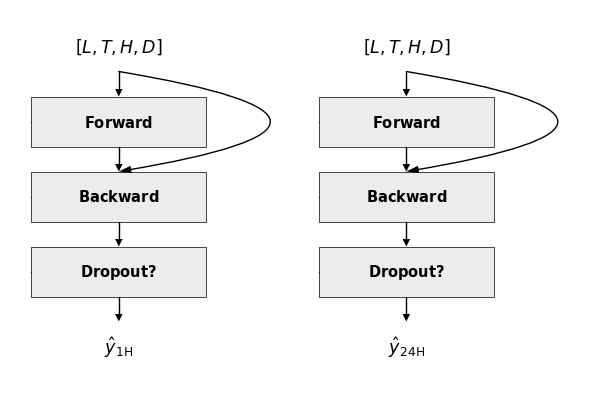

In [413]:
with schemdraw.Drawing() as d:

    for lab in y_labs:
        BDLSTM(d, lab)


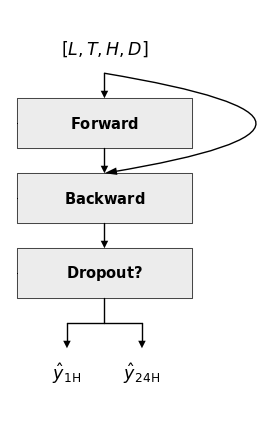

In [414]:
with schemdraw.Drawing() as d:

    BDLSTM(d, y_labs)



In [433]:
def MLP(d, output=r'$\hat y$'):

    d += (Inp := Circle(char_ht, color='white').label(r'$[L,T,H,D]$', color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(Inp.S)
    
    d += (FC1 := Process(node_wdth, 1, fill=gry, lw=bw).label(r'$\mathbf{FC\;layer}_\text{10 units}$', fontsize=12, color=blk))
    d += Arrow(**arr_kwargs).down(arr_l).at(FC1.S)

    d += (FC2 := Process(node_wdth, 1, fill=gry, lw=bw).label(r'$\mathbf{FC\;layer}_\text{10 units}$', fontsize=12, color=blk))
    
    if type(output) == str:
        d += Arrow(**arr_kwargs).down(arr_l).at(FC2.S)
        d += (y_hat := Circle(char_ht, color='white').label(output, color=blk))
    else:
        d += Line(lw=lw).down(arr_l).at(FC2.S)
        n_spaces, space_w = len(output) - 1, 1.5
        
        d.move(n_spaces * space_w / 2, 0)
        d += Line(lw=lw).left(n_spaces * space_w)
        for out in output:
            d += Arrow(**arr_kwargs).down(arr_l)
            d += (y_hat := Circle(char_ht, color='white').label(out, color=blk))
            d.move_from(y_hat.N, space_w, arr_l)
            
    d.move_from(Inp.E, node_wdth, char_ht)


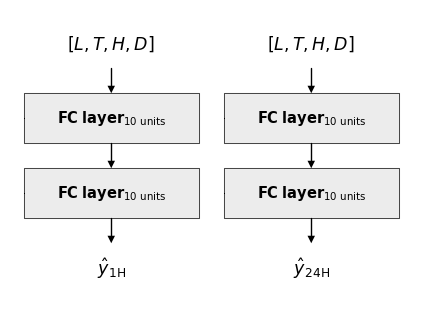

In [434]:
with schemdraw.Drawing() as d:

    for lab in y_labs:
        MLP(d, lab)


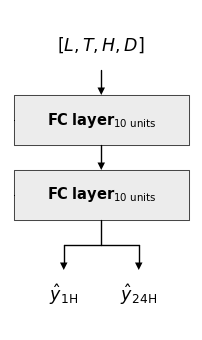

In [431]:
with schemdraw.Drawing() as d:

    MLP(d, y_labs)
